In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [81]:
df = sns.load_dataset('penguins')
df.head()
#bill : gaga    flipper : yüzgeç

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [82]:
# 'island' ve 'species' sütunlarına göre gruplayın ve gruplarını sayın
island_species_counts = df.groupby(['island', 'species']).size().reset_index(name='count')

# Sonucu yazdırın
print(island_species_counts)


      island    species  count
0     Biscoe     Adelie     44
1     Biscoe     Gentoo    124
2      Dream     Adelie     56
3      Dream  Chinstrap     68
4  Torgersen     Adelie     52


In [83]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [86]:
df.isnull().sum()   

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [87]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [88]:
df.shape 

(344, 7)

In [89]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols

cat_cols, num_cols = grab_col_names(df)
print(f"cat_cols: {cat_cols}")
print(f"num_cols: {num_cols}")




cat_cols: ['species', 'island', 'sex']
num_cols: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [90]:
def filling_null_values(df):
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)
    return df
def missing_nan_values_on_categorical(df):
    df['missing_sex'] = df['sex'].isnull().astype(int)
    df['sex'] = df['sex'].fillna('Unknown')
    return df.head(10)
filling_null_values(df)
missing_nan_values_on_categorical(df)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,missing_sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female,0
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,Unknown,1
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.30,20.6,190.0,3650.0,Male,0
6,Adelie,Torgersen,38.90,17.8,181.0,3625.0,Female,0
7,Adelie,Torgersen,39.20,19.6,195.0,4675.0,Male,0
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,Unknown,1
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,Unknown,1


In [91]:
# Benzersiz değerlerin sayısını ve tekrar sayılarını hesapla
value_counts = df['sex'].value_counts()

print("Benzersiz Değer Sayıları:")
print(value_counts)

Benzersiz Değer Sayıları:
sex
Male       168
Female     165
Unknown     11
Name: count, dtype: int64


In [92]:
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
missing_sex          0
dtype: int64


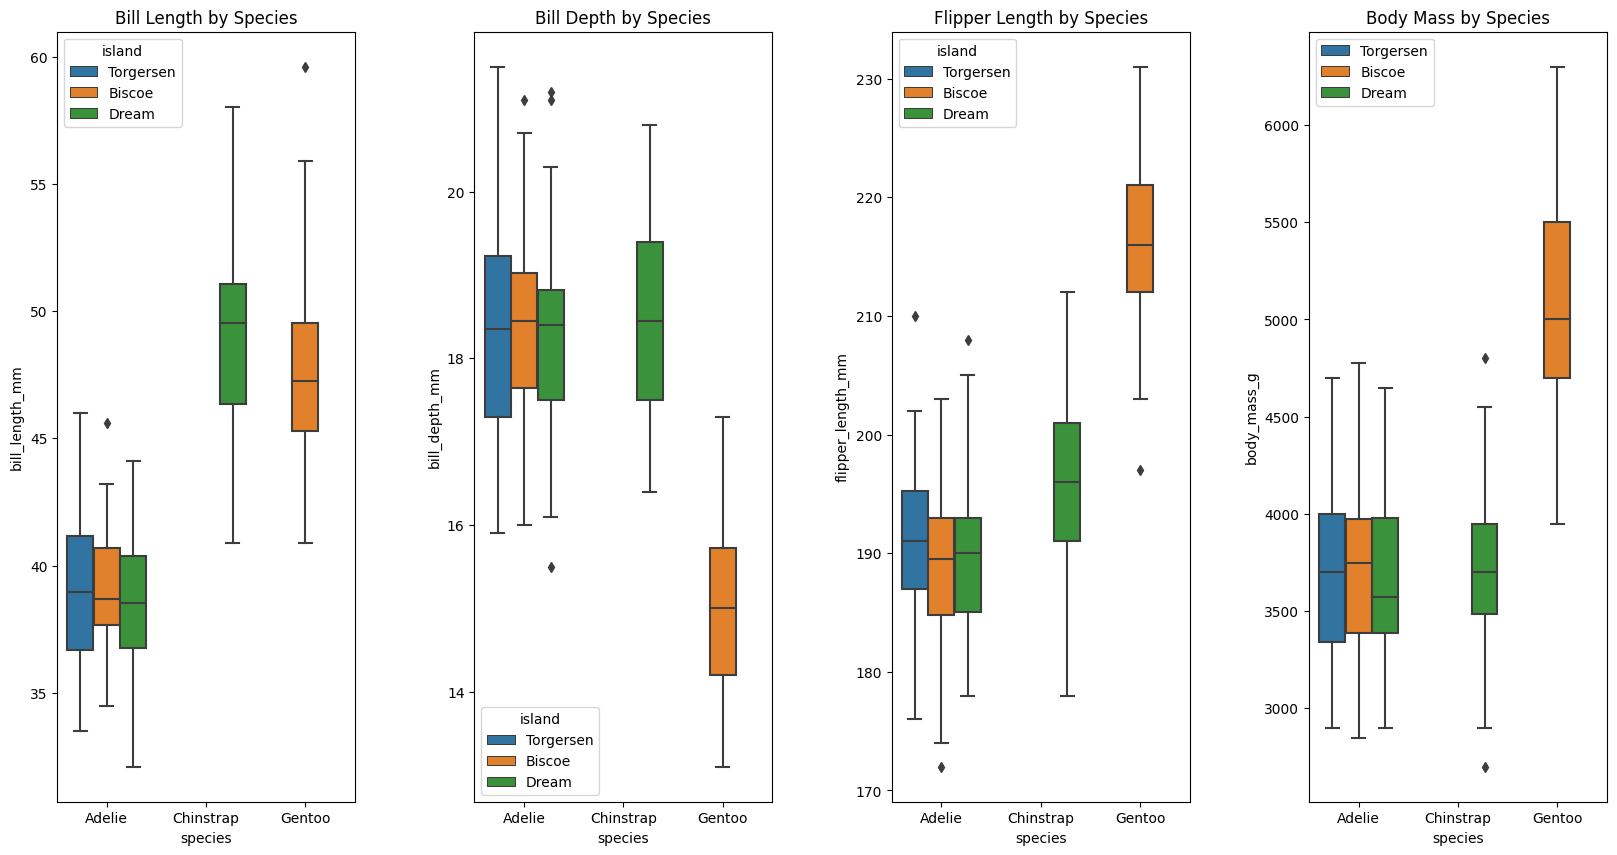

In [93]:
# Şekil ve alt grafikler oluştur
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,10))
plt.subplots_adjust(wspace=0.4)  

def plot_box_and_line(ax, x, y, title):
    sns.boxplot(x=x, y=y, hue="island", data=df, ax=ax) 
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    

plot_box_and_line(axes[0], 'species', 'bill_length_mm', 'Bill Length by Species')
plot_box_and_line(axes[1], 'species', 'bill_depth_mm', 'Bill Depth by Species')
plot_box_and_line(axes[2], 'species', 'flipper_length_mm', 'Flipper Length by Species')
plot_box_and_line(axes[3], 'species', 'body_mass_g', 'Body Mass by Species')
plt.legend()
plt.show()

species = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df['species'] = df['species'].map(species)




In [94]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def outlier_detection(dataframe):
    df_copy = dataframe.copy()
    for col in num_cols:
        low_limit, up_limit = outlier_thresholds(df_copy, col)
        df_copy.loc[(df_copy[col] < low_limit) | (df_copy[col] > up_limit), 'outlier'] = 1
        df_copy.loc[~((df_copy[col] < low_limit) | (df_copy[col] > up_limit)), 'outlier'] = 0
    return df_copy

for i in num_cols:
    print(i, ":", outlier_thresholds(df, i))

# Outlier tespitini gerçekleştirelim
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
outliers_df = outlier_detection(df)
for col in num_cols:
    print(col, outliers_df.loc[outliers_df.loc[:, 'outlier'] == 1, col])
#no outlier


bill_length_mm : (25.437499999999996, 62.337500000000006)
bill_depth_mm : (10.95, 23.349999999999998)
flipper_length_mm : (155.5, 247.5)
body_mass_g : (1750.0, 6550.0)
bill_length_mm Series([], Name: bill_length_mm, dtype: float64)
bill_depth_mm Series([], Name: bill_depth_mm, dtype: float64)
flipper_length_mm Series([], Name: flipper_length_mm, dtype: float64)
body_mass_g Series([], Name: body_mass_g, dtype: float64)


In [95]:
# Kategorik sütunları encode etmek
for col in cat_cols:
    unique_values = df[col].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[col] = df[col].replace(mapping)
    print(f"{col} Mapping: {mapping}")
    

species Mapping: {0: 0, 1: 1, 2: 2}
island Mapping: {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
sex Mapping: {'Male': 0, 'Female': 1, 'Unknown': 2}


In [96]:
from sklearn.preprocessing import RobustScaler

# Robust Scaling
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.describe().T

,count,mean,std,min,25%,50%,75%,max
species,344.0,0.918605,0.893320,0.000000,0.000000,1.0,2.000000,2.000000
island,344.0,1.209302,0.684970,0.000000,1.000000,1.0,2.000000,2.000000
bill_length_mm,344.0,-0.056911,0.590113,-1.338753,-0.560976,0.0,0.439024,1.642276
bill_depth_mm,344.0,-0.047731,0.635181,-1.354839,-0.548387,0.0,0.451613,1.354839
flipper_length_mm,344.0,0.169237,0.609732,-1.086957,-0.304348,0.0,0.695652,1.478261
body_mass_g,344.0,0.125727,0.666414,-1.125000,-0.416667,0.0,0.583333,1.875000
sex,344.0,0.543605,0.559430,0.000000,0.000000,1.0,1.000000,2.000000
missing_sex,344.0,0.031977,0.176194,0.000000,0.000000,0.0,0.000000,1.000000


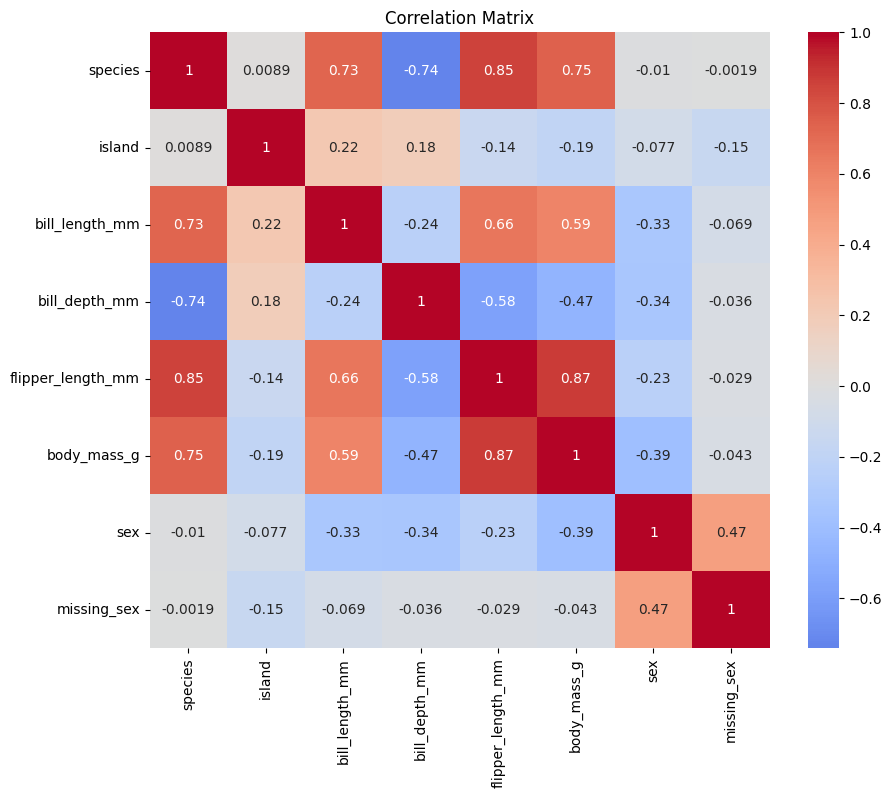

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [98]:
from scipy.stats import pearsonr

# H0: There is no significant correlation 
# H1: There is a significant correlation

correlation_coefficient, p_value = pearsonr(df['flipper_length_mm'], df['body_mass_g'])
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
    print("Dataset is suitable for linear regression.")
    print("Dataset is stationary.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")
    print("Dataset is not suitable for linear regression.")
    print("Dataset is not stationary.")


Correlation Coefficient: 0.8712211273375563
P-value: 1.025428276983666e-107
Reject the null hypothesis: There is a significant correlation.
Dataset is suitable for linear regression.
Dataset is stationary.


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Veriyi hazırlama
selected_features = ['sex', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[selected_features]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelleri ve isimlerini bir liste içinde tanımlayın
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("SVM", SVC(kernel='linear', C=1, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000, solver='adam', activation='relu', hidden_layer_sizes=(50,), random_state=42))
]

# Her model için cross-validation doğruluk, kesinlik, duyarlılık ve F1 puanlarını hesaplayın
for name, model in models:
    # Modeli eğitme
    model.fit(X_train, y_train)
    
    # Tahminler yapma
    y_pred = model.predict(X_test)
    
    # Accuracy hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix hesaplama
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report oluşturma
    cr = classification_report(y_test, y_pred)
    
    # Sonuçları yazdırma
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{cr}\n")

#best model is random forest

Model: Random Forest
Accuracy: 0.9710
Confusion Matrix:
[[31  0  1]
 [ 1 15  0]
 [ 0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.98        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69


Model: Logistic Regression
Accuracy: 0.9710
Confusion Matrix:
[[31  0  1]
 [ 1 15  0]
 [ 0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.98        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69


In [100]:

from sklearn.metrics import f1_score, precision_score, recall_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5-Fold çapraz doğrulama ile modeli değerlendirin
sonuclar = cross_val_score(model, X, y, cv=5)

# Çapraz doğrulama sonuçlarını yazdırın
print("Çapraz Doğrulama Sonuçları:")
print(sonuclar)
print("Ortalama Doğruluk:", sonuclar.mean())

# Modeli eğitme
model.fit(X_train, y_train)

# Tahminler yapma
y_pred = model.predict(X_test)

# Accuracy hesaplama
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix hesaplama
cm = confusion_matrix(y_test, y_pred)

# Classification Report oluşturma
cr = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print(f"Accuracy: {accuracy:.4f}")

print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{cr}\n")

Çapraz Doğrulama Sonuçları:
[0.98550725 0.98550725 0.98550725 0.98550725 0.97058824]
Ortalama Doğruluk: 0.9825234441602728
Accuracy: 0.9710
Confusion Matrix:
[[31  0  1]
 [ 1 15  0]
 [ 0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.98        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69




In [101]:
from sklearn.model_selection import train_test_split
#island Mapping: {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
#species Mapping: {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
# Verilerinizi eğitim ve test setlerine bölelim (örneğin, %80 eğitim, %20 test olarak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelinizi eğitim verileriyle eğitin
model.fit(X_train, y_train)

prediction = model.predict(X)

# Save the model as a pickle file
import pickle
def save_model_to_pickle(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model is saved to {filename}")

# Replace 'best_model.pkl' with the desired filename for your saved model
save_model_to_pickle(model, 'penguin_species_model.pkl')



Model is saved to penguin_species_model.pkl


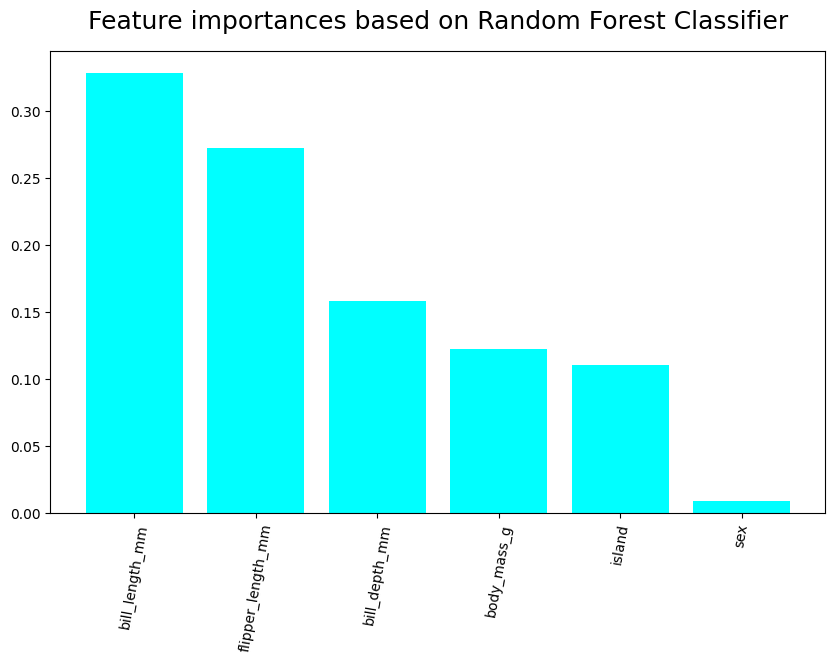

In [102]:
import matplotlib.pyplot as plt
import numpy as np

ranking = model.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature importances based on Random Forest Classifier", y=1.03, size=18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()


In [103]:
#hypothesis testing between bill_length_mm and species

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal

# H0: The distribution of the bill length of the species is normal.
# H1: The distribution of the bill length of the species is not normal.

# Shapiro-Wilk Test
print("Shapiro-Wilk Test")
test_statistic, pvalue = shapiro(df['bill_length_mm'])
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

alpha = 0.05  # significance level

if pvalue < alpha:
    print("Reject the null hypothesis: The distribution of the bill length of the species is not normal.")
else:
    print("Fail to reject the null hypothesis: The distribution of the bill length of the species is normal.")

# H0: The variances of the bill length of the species are equal.
# H1: The variances of the bill length of the species are not equal.

# Levene's Test
print("\nLevene's Test")
test_statistic, pvalue = levene(df['bill_length_mm'][df['species'] == 0],
                                df['bill_length_mm'][df['species'] == 1],
                                df['bill_length_mm'][df['species'] == 2])
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

alpha = 0.05  # significance level

if pvalue < alpha:
    print("Reject the null hypothesis: The variances of the bill length of the species are not equal.")
else:
    print("Fail to reject the null hypothesis: The variances of the bill length of the species are equal.")

# H0: The average bill length of the species are equal.
# H1: The average bill length of the species are not equal.

# One-Way ANOVA Test
print("\nOne-Way ANOVA Test")
test_statistic, pvalue = f_oneway(df['bill_length_mm'][df['species'] == 0],
                                      df['bill_length_mm'][df['species'] == 1],
                                        df['bill_length_mm'][df['species'] == 2])
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

alpha = 0.05  # significance level

if pvalue < alpha:
    print("Reject the null hypothesis: The average bill length of the species are not equal.")
else:
    print("Fail to reject the null hypothesis: The average bill length of the species are equal.")

# H0: The average bill length of the species are equal.
# H1: The average bill length of the species are not equal.

# Kruskal-Wallis Test
print("\nKruskal-Wallis Test")
test_statistic, pvalue = kruskal(df['bill_length_mm'][df['species'] == 0],
                                        df['bill_length_mm'][df['species'] == 1],
                                        df['bill_length_mm'][df['species'] == 2])
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

alpha = 0.05  # significance level

if pvalue < alpha:
    print("Reject the null hypothesis: The average bill length of the species are not equal.")
else:
    print("Fail to reject the null hypothesis: The average bill length of the species are equal.")



Shapiro-Wilk Test
Test Statistic = 0.9757, p-value = 0.0000
Reject the null hypothesis: The distribution of the bill length of the species is not normal.

Levene's Test
Test Statistic = 2.0269, p-value = 0.1333
Fail to reject the null hypothesis: The variances of the bill length of the species are equal.

One-Way ANOVA Test
Test Statistic = 405.0954, p-value = 0.0000
Reject the null hypothesis: The average bill length of the species are not equal.

Kruskal-Wallis Test
Test Statistic = 244.9412, p-value = 0.0000
Reject the null hypothesis: The average bill length of the species are not equal.


In [104]:
#overfitting test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Verilerinizi eğitim ve test setlerine bölelim (örneğin, %80 eğitim, %20 test olarak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelinizi eğitim verileriyle eğitin
model.fit(X_train, y_train)

# Tahminler yapma
y_pred = model.predict(X_test)

# Accuracy hesaplama
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix hesaplama
cm = confusion_matrix(y_test, y_pred)

# Classification Report oluşturma
cr = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print(f"Accuracy: {accuracy:.4f}")

print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{cr}\n")



Accuracy: 0.9710
Confusion Matrix:
[[31  0  1]
 [ 1 15  0]
 [ 0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.98        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69


